In [ ]:
# import libs
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# define state
class BMIState(TypedDict):
    height_m: float
    weight_kg: float
    bmi: float
    cat: str

In [ ]:
# calculate BMI
def calculate_bmi(state:BMIState)->BMIState:
    height = state["height_m"]
    weight = state["weight_kg"]

    bmi = weight/(height**2)
    state["bmi"] = round(bmi,2)
    return state

In [ ]:
# BMI category
def cat_bmi(state:BMIState)->BMIState:

    bmi = state["bmi"]

    if bmi < 18.5 :
        state["cat"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["cat"] = "Normal"
    elif 25 <= bmi < 30:
        state["bmi"] = "Overweight"
    else:
        state["bmi"] = "Obese"
    return state

In [ ]:
# define graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node("cal_bmi",calculate_bmi)
graph.add_node("cat_bmi",cat_bmi)

# add edges to your graph
graph.add_edge(START,"cal_bmi")
graph.add_edge("cal_bmi","cat_bmi")
graph.add_edge("cat_bmi",END)

# compile the graph
workflow = graph.compile()

In [ ]:
# execute the graph
initial_state = {"weight_kg":65,"height_m":1.75}
final_state = workflow.invoke(initial_state)
print(final_state)
print(f"BMI: {final_state["bmi"]}")
print(f"Category: {final_state["cat"]}")

{'height_m': 1.75, 'weight_kg': 65, 'bmi': 21.22, 'cat': 'Normal'}
BMI: 21.22
Category: Normal


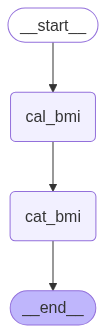

In [28]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())